## Coding Example

### Dataset Description

The dataset has Number 768 sample records of patients. There are 8 features:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction	
- Age: Years

Using these 8 predictor variables we need to predict the target variable 'Outcome'. It contains binary value: 1 if the patient has diabetes and 0 if the patient doesn't have diabetes.


In [1]:
import pandas as pd

dataset = pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: xlabel='Outcome'>

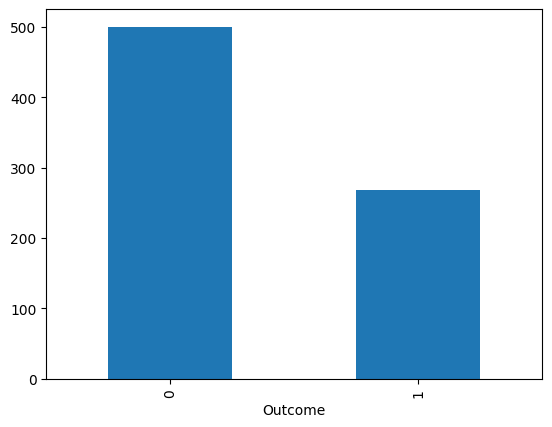

In [3]:
dataset.Outcome.value_counts().plot(kind="bar")

### Data Preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

In [5]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.25, random_state=898, stratify=y)

In [30]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(class_weight = {0:1,1:2})
logistic_regression.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 2})

In [31]:
y_pred = logistic_regression.predict(X_test)

# Evaluation metrics

Now that we have predicted whether or not the patients in the test set have diabetes, let's evaluate how good is the prediction made by logistic regression. We can evaluate the performance of the classifier using various metrics. We will learn about the following metrics.
 
 
 - Confusion Matrix
 - Accuracy
 - Precision
 - Recall
 - F1-score 

All of these metrics are available in Scikit-Learn's [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) package  for [classification](https://scikit-learn.org/stable/modules/classes.html#classification-metrics).

Note: Confusion matrix is not a performance metric in itself but most of the other performance metrics can be derived from the confusion matrix.

## Accuracy
The simplest performance metric for classification models is accuracy, expressed as


$$\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}} = \frac{TP + TN}{TP+FP+TN + FN}$$

It is the fraction of predictions that the classifier predicted correctly in the entire testing dataset. This metric only cares for the correct predictions while neglecting the false predictions. Thus is of interest in cases where true positives and true negatives have greater importance than false postitives and false negatives.


In [32]:
from sklearn.metrics import accuracy_score

print( accuracy_score(y_test, y_pred) )

0.7916666666666666


### Accuracy Paradox
 
Accuracy paradox refers to the inability of accuracy metric to correctly measure the performance in case of skewed classes. Classes are skewed if a large number of examples belong to one class and only a small number of examples belong to the other class.

## Precision

Precision measures how often the examples predicted as positive by our classifier are actually positive. The expression for Precision is given as:

$$\text{Precision} = \frac{\text{True Positive}}{\text{Total number of positives predicted}} = \frac{TP}{TP+FP}$$




In [33]:
from sklearn.metrics import precision_score

print( precision_score(y_test, y_pred))

0.684931506849315


## Recall

Recall measures how often the examples that are actually positive are predicted as positive by our classifier. Following is the expression for Recall:

$$\text{Recall} =  \frac{\text{True Positive}}{\text{Total number of actual positives}} = \frac{TP}{TP + FN}$$

In [34]:
from sklearn.metrics import recall_score

print( recall_score(y_test, y_pred))

0.746268656716418


## Confusion Matrix

A confusion matrix is a 2d array as shown below. The rows of the matrix represent the instances of the true classes, while the columns represent the instances of predicted classes. That is to say, given a confusion matrix $C$, the entry $c_{i,j}$ is the number of observations known to belong to class $i$ but predicted to be in class $j$. 

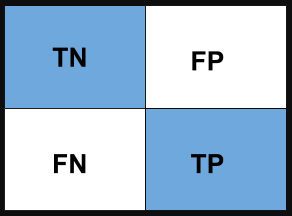
where

**TN (True Negative)** is the number of examples that our classifier predicted as negative $(\hat{y} = 0)$ and are actually negative $(y = 0)$.

**FN (False Negative)** is the number of examples that our classifier predicted as negative $(\hat{y} = 0)$ but are actually positive $(y = 1)$.

**TP (True Positive)** is the number of examples that our classifier predicted as positive $(\hat{y} = 1)$ and are actually positive $(y = 1)$.

**FP (False Positive)** is the number of examples that our classifier predicted as positive $(\hat{y} = 1)$ but are actually negative $(y = 0)$.

The false positives is called **Type I error** while the false negatives are  called **Type II error**. The diagonal of the confusion matrix contains the TN and TP. These are the values that the classifier got right. So greater the values in the diagonal, better the classifier's performance.

We can use the [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function from the [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) to compute the confusion matrix. The information provided by the confusion matrix can be used for the computation of accuracy, precision, recall, and F1 score.

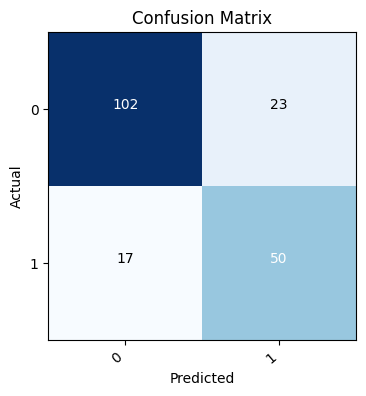

In [35]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

labels = y_test.unique()
matrix = confusion_matrix(y_test, y_pred, labels=labels, normalize=None)

fig,ax = plt.subplots(figsize=(12,4))
ax.imshow(matrix, cmap="Blues")
t_hold = (matrix.max() - matrix.min()) / 2.
for row,col in itertools.product(range(len(labels)), range(len(labels))):
    color = "white" if matrix[row,col] > t_hold else "black"
    ax.text(col, row, matrix[row, col], horizontalalignment="center", color=color)
tick_marks = np.arange(len(labels))
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=40, ha="right")
ax.set_ylabel("Actual")
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
plt.show()

## F1 Score
F1 Score is the harmonic mean of _precision_ and _recall_. It is calculated as:
\begin{align*}
\text{F1 score} = \frac{2}{\frac{1}{\text{Precision}} + \frac{1}{\text{Recall}}} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision}  + \text{Recall}}
\end{align*}

F1 Score is low when either the _precision_ or _recall_ is low, and high if both metrics are high. When the precision and recall values are equal, F1 score will be maximum. If our classifier needs to have a balance between precision and recall then we can use the F1 Score. It is also a useful metric as it gives a single value that is representative of both _precision_ and _recall_. F1 Score metric is useful when 
- the false positives and false negatives are costly
- the instances of true negatives are more
- increase in the data size doesn't make any difference in the outcome.

In [36]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred))

0.7142857142857143
